In [1]:
bids_folder = '/data/ds-tmsrisk/'
import os.path as op
import arviz as az

from tms_risk.cogmodels.fit_model import build_model, get_data
import pymc as pm
from tqdm.notebook import tqdm

In [3]:
dfs = []
models = []
idatas = []

model_labels  = ['10_null', '10a', '10b', '10c', '11_null', '11a', '11b', '11c', '12a', '12b', '12c']#, '12d']

for model_label in tqdm(model_labels):
    dfs.append(get_data(model_label=model_label))

    model = build_model(model_label, dfs[-1])
    idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf')).sel(draw=slice(None, None, 20))

    model.build_estimation_model()

    with model.estimation_model:
        pm.compute_log_likelihood(idata)

    models.append(model)
    idatas.append(idata)

  0%|          | 0/11 [00:00<?, ?it/s]

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [4]:
model_mapping = {
    '10_null': 'PMC Model (null, no TMS effect on evidence SDs)',
    '10a': 'PMC Model (TMS affects n1 and n2 evidence SDs)',
    '10b': 'PMC Model (TMS affects n1 evidence SD only)',
    '10c': 'PMC Model (TMS affects n2 evidence SD only)',
    
    '11_null': 'PMC Model (null, no TMS effect on memory and perceptual noise SDs, shared perceptual noise)',
    '11a': 'PMC Model (TMS affects memory and perceptual noise SDs, shared perceptual noise)',
    '11b': 'PMC Model (TMS affects memory noise SD only, shared perceptual noise)',
    '11c': 'PMC Model (TMS affects perceptual noise SD only, shared perceptual noise)',
    
    '12a': 'PMC Model (TMS affects risky and safe prior means)',
    '12b': 'PMC Model (TMS affects risky prior mean only)',
    '12c': 'PMC Model (TMS affects safe prior mean only)',
    '12d': 'PMC Model (TMS affects risky prior SD only)',
    '12e': 'PMC Model (TMS affects safe prior SD only)',
    '12f': 'PMC Model (TMS affects both risky and safe prior SDs)',
    '12g': 'PMC Model (TMS affects both risky and safe prior means and SDs)'
}

models = {}
for model_label, idata in zip(model_labels, idatas):
    models[model_mapping[model_label]] = idata

In [5]:
comparison = az.compare(models)

/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.67 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.67 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

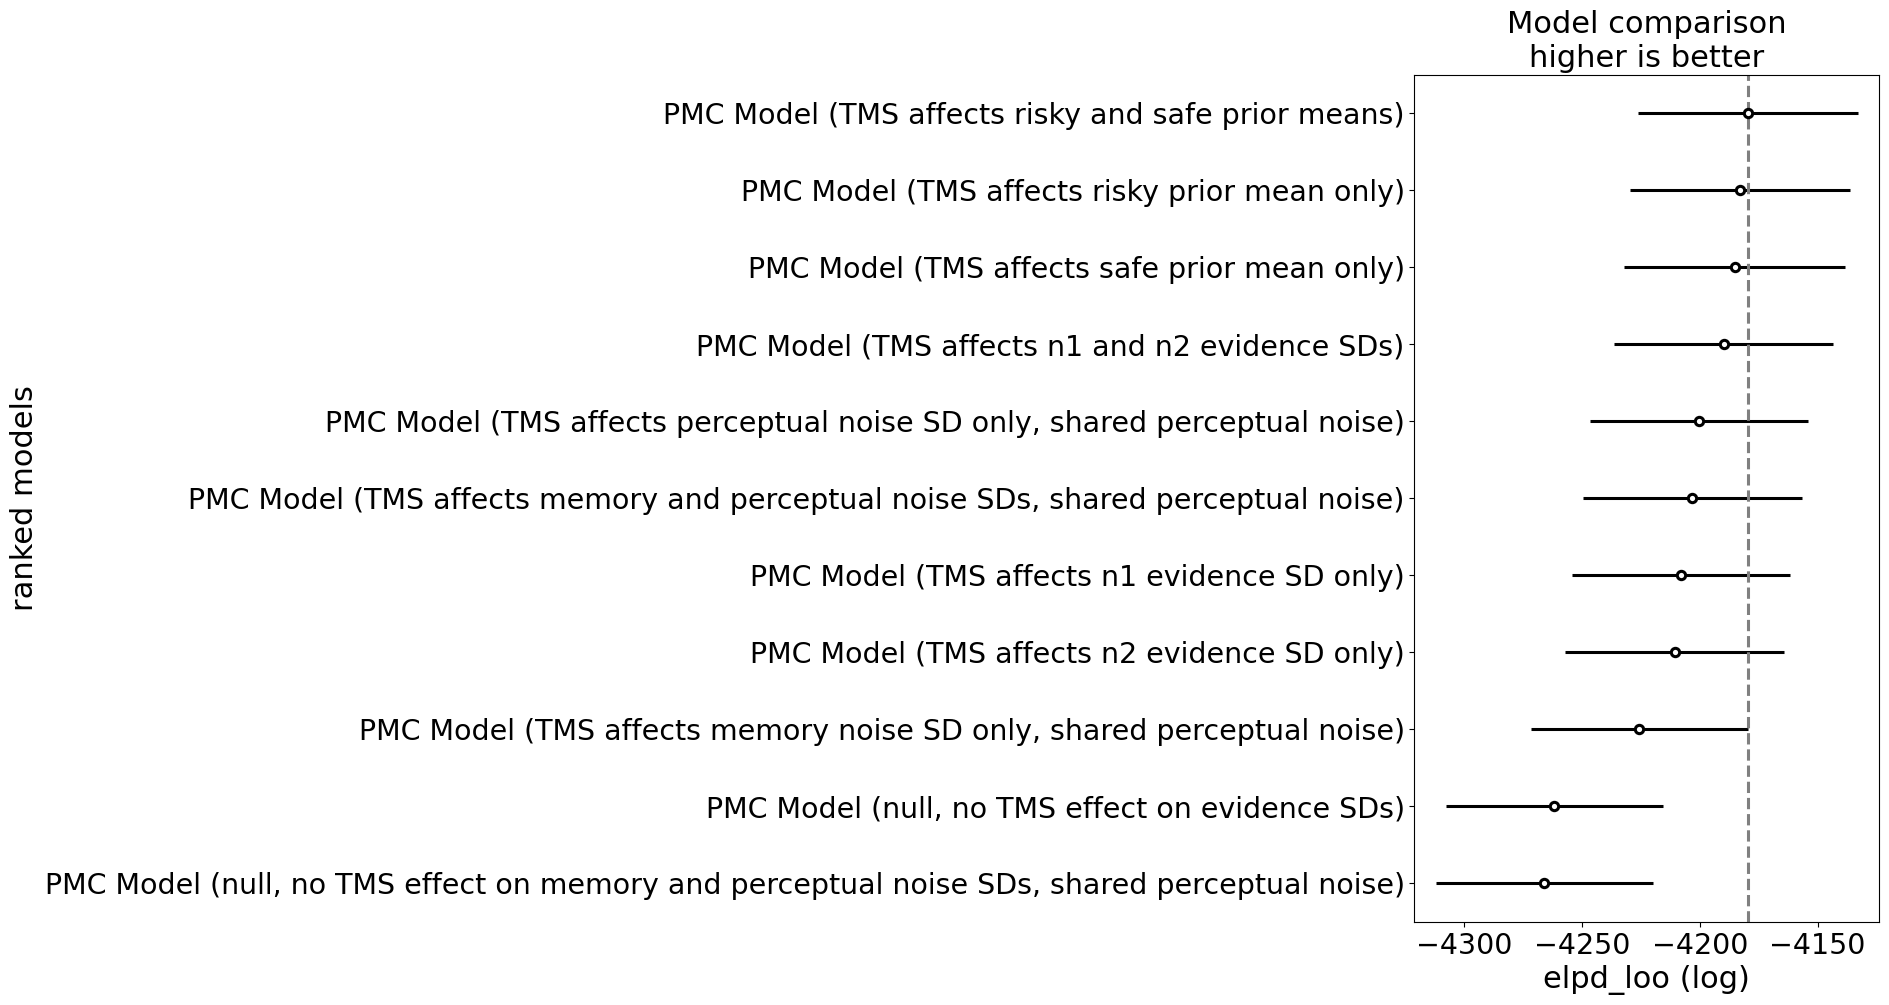

In [8]:
az.plot_compare(comparison)

In [7]:
comparison

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
PMC Model (TMS affects risky and safe prior means),0,-4179.516998,163.778376,0.000000,6.186968e-01,46.755386,0.000000,False,log
PMC Model (TMS affects risky prior mean only),1,-4182.753096,160.211689,3.236098,1.650980e-11,46.679448,2.490984,False,log
PMC Model (TMS affects safe prior mean only),2,-4185.163023,163.865384,5.646025,1.758526e-11,46.874079,4.255627,True,log
PMC Model (TMS affects n1 and n2 evidence SDs),3,-4189.938391,180.502531,10.421393,3.813032e-01,46.649076,9.569650,False,log
"PMC Model (TMS affects perceptual noise SD only, shared perceptual noise)",4,-4200.333830,154.735375,20.816832,4.590988e-11,46.398404,9.682122,False,log
"PMC Model (TMS affects memory and perceptual noise SDs, shared perceptual noise)",5,-4203.142323,170.454379,23.625325,2.197742e-11,46.374926,10.147390,True,log
PMC Model (TMS affects n1 evidence SD only),6,-4208.004069,163.603182,28.487071,1.842517e-11,46.414454,10.454354,False,log
PMC Model (TMS affects n2 evidence SD only),7,-4210.654325,167.572153,31.137327,1.844847e-11,46.540909,10.229641,False,log
"PMC Model (TMS affects memory noise SD only, shared perceptual noise)",8,-4225.655711,160.675021,46.138713,1.967114e-11,46.185349,11.805537,False,log
"PMC Model (null, no TMS effect on evidence SDs)",9,-4261.679208,135.364558,82.162210,1.725715e-12,46.153826,12.231417,False,log
